In [2]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.0 MB/s eta 0:00:00


Most likely hidden states: [0 1 2 2 3 3 3 3]


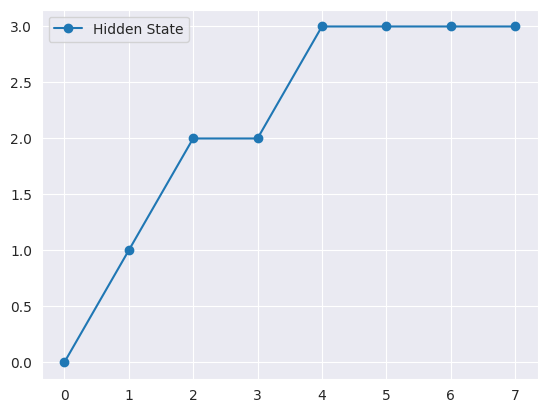

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

# Define the state space
states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)

# Define the observation space
observations = ["Loud", "Soft"]
n_observations = len(observations)

# Define the initial state distribution
start_probability = np.array([0.8, 0.1, 0.1, 0.0])

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
									[0.0, 0.6, 0.4, 0.0],
									[0.0, 0.0, 0.6, 0.4],
									[0.0, 0.0, 0.0, 1.0]])

# Define the observation likelihoods
emission_probability = np.array([[0.7, 0.3],
								[0.4, 0.6],
								[0.6, 0.4],
								[0.3, 0.7]])

# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)

# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

# Plot the results
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.legend()
plt.show()